In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [5]:
df=pd.read_csv('Loan payments data.csv')
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [3]:
df.shape

(500, 11)

In [4]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [5]:
df.tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [7]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [8]:
df.columns 

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [9]:
df.drop(['Loan_ID', 'paid_off_time'], axis=1, inplace=True)
df

,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,NaN,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,3.0,28,High School or Below,male
496,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,14.0,26,High School or Below,male
497,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,3.0,30,college,male
498,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,1.0,38,college,female


In [10]:
df.isnull().sum()

loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

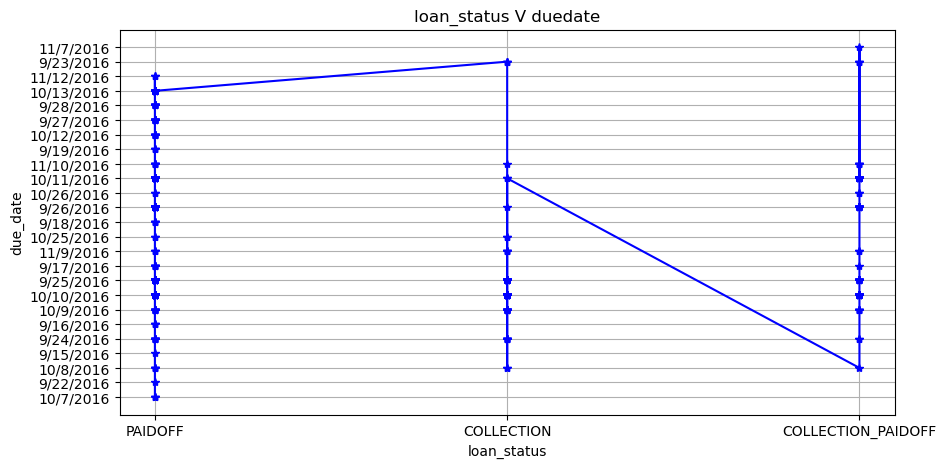

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['loan_status'],df['due_date'],marker='*',color='blue')
plt.xlabel('loan_status')
plt.ylabel('due_date')
plt.title('loan_status V duedate')
plt.grid()


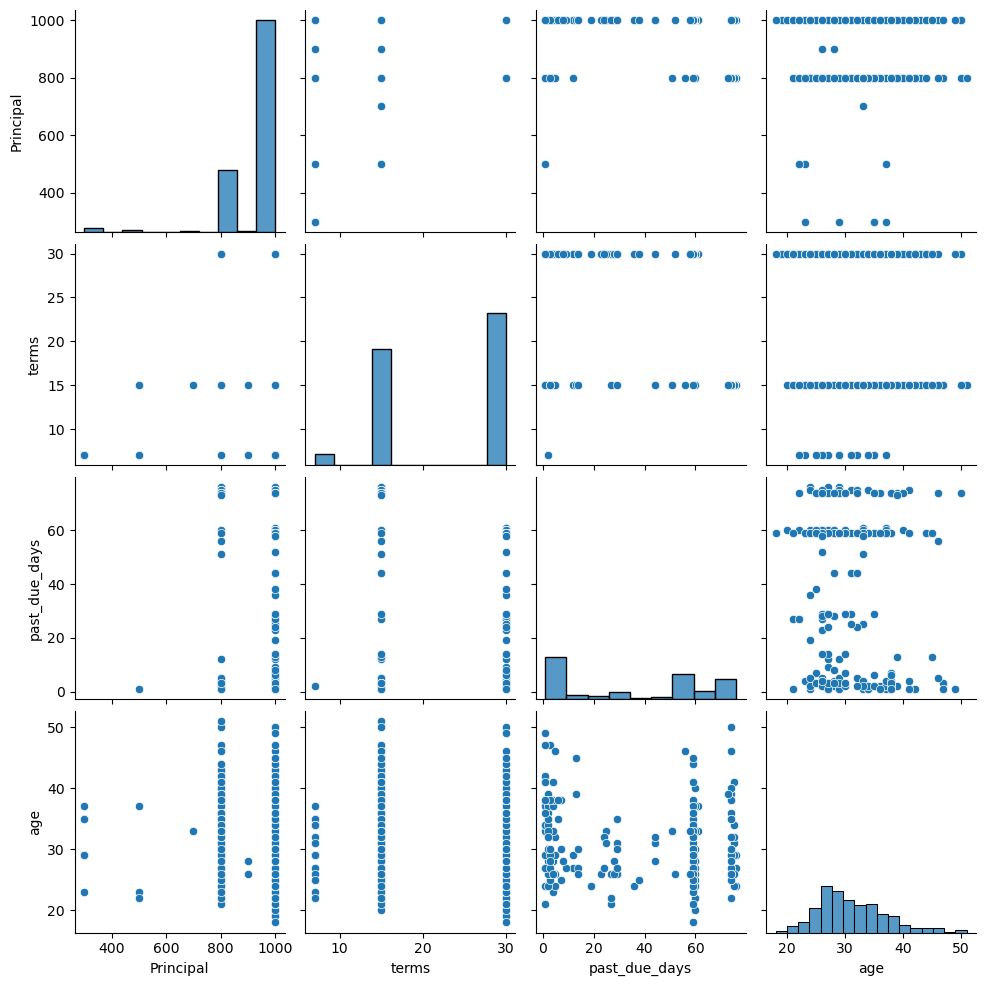

In [12]:
sns.pairplot(df)

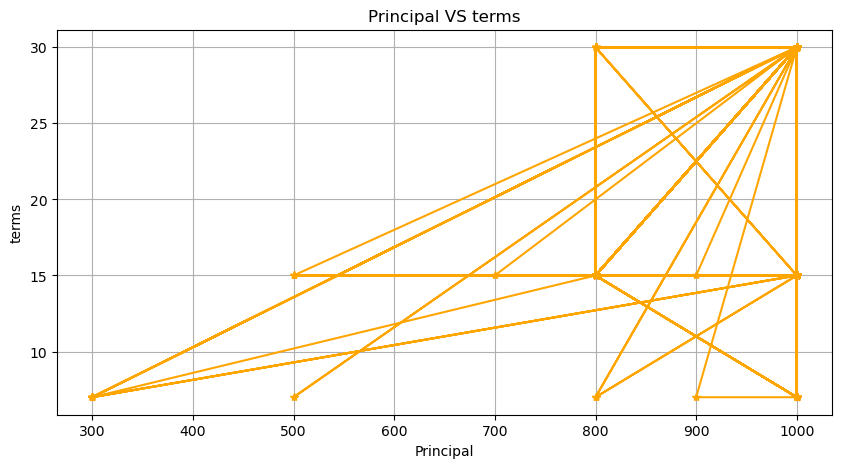

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df['Principal'],df['terms'],marker='*',color='orange')
plt.xlabel('Principal')
plt.ylabel('terms')
plt.title('Principal VS terms')
plt.grid()
plt.show()

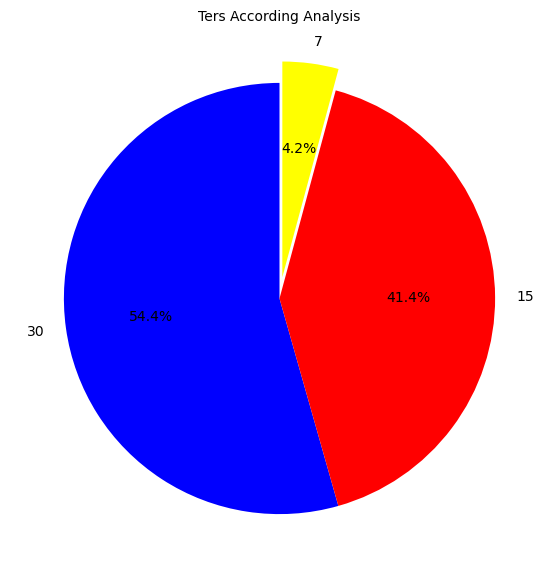

In [10]:
labels=df['terms'].value_counts().index
colors=['blue','red','yellow']
explode=[0,0,0.1]
values=df['terms'].value_counts().values

plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Ters According Analysis',color='black',fontsize=10)
plt.show()


In [13]:
df.isnull().sum()

loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [14]:

df['past_due_days']=df['past_due_days'].fillna(df['past_due_days'].mean())

In [15]:
df.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [16]:
df.dtypes

loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

In [17]:
le=LabelEncoder()

In [18]:
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=le.fit_transform(df[column]) 

In [19]:
df.dtypes

loan_status         int32
Principal           int64
terms               int64
effective_date      int32
due_date            int32
past_due_days     float64
age                 int64
education           int32
Gender              int32
dtype: object

In [20]:
X=df.drop(columns='loan_status')
Y=df['loan_status']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


## LINEAR REGRESSION

In [22]:
model1=LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [67]:
Y_pred1=model1.predict(X_test)
Y_pred1

array([0.89495589, 1.41424937, 0.91434268, 1.45667663, 1.41435804,
       0.8952819 , 0.91477735, 1.24332858, 1.65605967, 1.71561947,
       1.34904019, 1.5799499 , 1.83594813, 1.34105877, 0.91314732,
       0.83093728, 1.80303945, 1.43830754, 0.77251998, 1.00095944,
       1.76125299, 1.45858336, 1.78646515, 0.88886152, 1.20228145,
       1.76056734, 2.05267547, 1.33150924, 1.46607074, 1.03983607,
       1.58396808, 0.91456002, 1.55754858, 1.35807709, 1.79332163,
       1.01174685, 1.70064115, 1.46509272, 1.33248726, 1.24463261,
       0.88712281, 1.43765552, 1.80412614, 1.45613328, 1.24376326,
       1.24354592, 1.68372022, 1.25143821, 1.95156599, 1.11481892,
       1.32701416, 1.33205259, 1.43939423, 1.95358577, 1.45569861,
       1.41327135, 1.48827675, 1.1155796 , 1.35764242, 1.36827863,
       1.81754784, 1.64959703, 0.79248418, 1.77331245, 1.34181945,
       1.20119476, 1.92385325, 1.21491336, 1.49371837, 0.8956079 ,
       0.88777483, 0.913908  , 1.59029084, 1.88550965, 0.71355

In [71]:
mae1= mean_absolute_error(Y_test, Y_pred1)
mse1 = mean_squared_error(Y_test, Y_pred1)
r21 = r2_score(Y_test, Y_pred1)

print("Mean Absolute Error:", mae1)
print("Mean Squared Error:", mse1)
print("R2 Score:", r21)

Mean Absolute Error: 0.6950522002659958
Mean Squared Error: 0.5336990440276831
R2 Score: 0.21699083916126294


## DECISION TREE REGESSOR

In [25]:
model2=DecisionTreeRegressor()
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [26]:
Y_pred2=model2.predict(X_test)
Y_pred2

array([0., 2., 0., 2., 2., 0., 0., 2., 2., 1., 2., 2., 1., 2., 0., 0., 1.,
       2., 0., 0., 1., 1., 2., 0., 2., 1., 1., 2., 2., 0., 1., 0., 1., 2.,
       2., 0., 1., 2., 2., 2., 0., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 0., 1., 2., 2., 1., 2.,
       2., 0., 0., 0., 2., 2., 0., 0., 2., 2., 1., 1., 2., 2., 1., 2., 0.,
       2., 2., 1., 0., 2., 0., 1., 0., 0., 1., 0., 2., 2., 1., 2.])

In [73]:
mae2 = mean_absolute_error(Y_test, Y_pred2)
mse2 = mean_squared_error(Y_test, Y_pred2)
r22 = r2_score(Y_test, Y_pred2)

print("Mean Absolute Error:", mae2)
print("Mean Squared Error:", mse2)
print("R2 Score:", r22)

Mean Absolute Error: 0.01
Mean Squared Error: 0.01
R2 Score: 0.9853286384976526


## SVR

In [28]:
model3=SVR()
model3.fit(X_train,Y_train)

SVR()

In [29]:
Y_pred3=model3.predict(X_test)
Y_pred3

array([1.90541662, 1.90016935, 1.90506499, 1.90023904, 1.90017042,
       1.90541773, 1.90507376, 1.9002144 , 1.90045548, 1.89221815,
       1.89948501, 1.89952517, 1.89285277, 1.90021807, 1.90501865,
       1.90782872, 1.89221692, 1.89950401, 1.90523986, 1.90193762,
       1.89300774, 1.89862231, 1.89956283, 1.90506618, 1.90019824,
       1.89327535, 1.89311817, 1.9002221 , 1.89950852, 1.90508597,
       1.89864637, 1.90506991, 1.89500451, 1.90021127, 1.90029432,
       1.90506684, 1.8926819 , 1.89951335, 1.90023307, 1.9002152 ,
       1.90505693, 1.89950187, 1.89223228, 1.90023166, 1.90021878,
       1.9002171 , 1.90029191, 1.90016464, 1.89287955, 1.90017302,
       1.90020929, 1.90023076, 1.89948719, 1.89253238, 1.90022114,
       1.90014821, 1.9001558 , 1.9001922 , 1.90019356, 1.90022609,
       1.89196131, 1.8994459 , 1.9055369 , 1.89326166, 1.90021585,
       1.90016419, 1.89329204, 1.90017316, 1.90019306, 1.90541641,
       1.90506848, 1.9050519 , 1.9002742 , 1.90021759, 1.90798

In [75]:
mae3 = mean_absolute_error(Y_test, Y_pred3)
mse3 = mean_squared_error(Y_test, Y_pred3)
r23 = r2_score(Y_test, Y_pred3)

print("Mean Absolute Error:", mae3)
print("Mean Squared Error:", mse3)
print("R2 Score:", r23)

Mean Absolute Error: 0.7238839034895402
Mean Squared Error: 1.0685134481565357
R2 Score: -0.5676547068024291


## RANDOM FOREST REGRESSOR


In [31]:
model4=RandomForestRegressor()
model4.fit(X_train,Y_train)

RandomForestRegressor()

In [32]:
Y_pred4=model4.predict(X_test)
Y_pred4

array([0.  , 2.  , 0.  , 2.  , 2.  , 0.  , 0.  , 2.  , 2.  , 1.  , 2.  ,
       2.  , 1.  , 2.  , 0.  , 0.  , 1.  , 2.  , 0.  , 0.33, 1.  , 0.45,
       2.  , 0.01, 2.  , 1.  , 1.  , 2.  , 2.  , 0.  , 0.56, 0.  , 1.  ,
       2.  , 2.  , 0.  , 1.  , 2.  , 2.  , 2.  , 0.  , 2.  , 1.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 1.  , 2.  , 2.  , 2.  , 2.  , 1.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 2.  , 1.  , 2.  , 0.  , 1.  , 2.  , 2.  ,
       1.  , 2.  , 2.  , 0.  , 0.  , 0.  , 2.  , 2.  , 0.  , 0.02, 2.  ,
       2.  , 1.  , 1.  , 2.  , 2.  , 1.  , 2.  , 0.  , 2.  , 2.  , 1.  ,
       0.  , 2.  , 0.  , 0.59, 0.  , 0.  , 1.  , 0.  , 2.  , 2.  , 1.  ,
       2.  ])

In [77]:
mae = mean_absolute_error(Y_test, Y_pred4)
mse = mean_squared_error(Y_test, Y_pred4)
r2 = r2_score(Y_test, Y_pred4)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 0.021
Mean Squared Error: 0.011136
R2 Score: 0.9836619718309859


## XGBOOST

In [34]:
model5=XGBRegressor()
model5.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
Y_pred5=model5.predict(X_test)
Y_pred5

array([-3.9809311e-05,  1.9999462e+00,  2.3734145e-05,  1.9999522e+00,
        1.9999462e+00, -3.9809311e-05,  2.3734145e-05,  1.9999462e+00,
        1.9999462e+00,  1.0000187e+00,  1.9999462e+00,  1.9999522e+00,
        1.0000187e+00,  1.9999462e+00,  2.3734145e-05, -3.9809311e-05,
        1.0000247e+00,  1.9999462e+00,  2.3734145e-05,  2.9116747e-01,
        1.0000247e+00,  9.4523910e-04,  1.9999522e+00,  2.3734145e-05,
        1.9999462e+00,  1.0000247e+00,  1.0000247e+00,  1.9999522e+00,
        1.9999462e+00,  2.3734145e-05,  9.4523910e-04,  2.3734145e-05,
        1.0000187e+00,  1.9999522e+00,  1.9999522e+00,  2.3734145e-05,
        1.0000187e+00,  1.9999462e+00,  1.9999522e+00,  1.9999462e+00,
        2.3734145e-05,  1.9999462e+00,  1.0000247e+00,  1.9999522e+00,
        1.9999462e+00,  1.9999462e+00,  1.9999522e+00,  1.9999462e+00,
        1.0000187e+00,  1.9999462e+00,  1.9999462e+00,  1.9999522e+00,
        1.9999462e+00,  1.0000187e+00,  1.9999522e+00,  1.9999462e+00,
      

In [79]:
mae = mean_absolute_error(Y_test, Y_pred5)
mse = mean_squared_error(Y_test, Y_pred5)
r2 = r2_score(Y_test, Y_pred5)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 0.03224976441837498
Mean Squared Error: 0.02762758480912743
R2 Score: 0.9594665765762329
